# Supervised Learning - Linear Regression

Do you remember the recipe for Machine Learning? Let me remind you once again!

* Define Problem : We start by defining the problem we are trying to solve. This can be as simple as prediction of your next semester's result based on your previous results.
* Collect Data : Next step is to collect relevant data based on the problem definition. This can be your grades in different semesters.
* Prepare Data : The data collected for our problem is preprocessed. This can be removing redundant grades and replacing the missing ones.
* Select Model(Algorithm) : After the data is ready, we proceed to select the machine learning model. The selection is based on the problem type e.g. classification, regression etc and the data that is available to us. The model can be linear regression model in our case.
* Select Model(Algorithm) : After the data is ready, we proceed to select the machine learning model. The selection is based on the problem type e.g. classification, regression etc and the data that is available to us. The model can be linear regression model in our case.
* Train Model : The selected model is then trained to learn from the data we have collected.
* Evaluate Model : Final step is to evaluate the model that we have trained for accuracy and view the results.
This is exactly what we are going to do here.

## Step 1 - Define Problem

Sometime you look at someone and wonder what is their weight? <br> <br>
<img src="files/img.gif">

It is indeed rude to ask someone their weight. What if I told you that we can use Machine Learning to predict the weight of an animal using the weight of their brain! <br>
How cool is that? <br>

The most intelligent Bioligists at AwesomeLand have spent years collecting data about various animals, birds and insects. You have been provided with this data and now your job is to predict the weight of the body of an animal based on its weight of the brain. <br> 

## Step 2 - Collect & Prepare Data

Step 2.1 - Import Data & Primary Data Analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("data.csv") 

Now let us do some quick data analysis!

In [35]:
df.shape

(62, 3)

In [36]:
df.head(10)

,Body,Brain,Type
0,NaN,0.005,Bird
1,NaN,0.010,Bird
2,NaN,0.023,Bird
3,NaN,0.048,Bird
4,NaN,0.023,Bird
5,NaN,0.060,Bird
6,NaN,0.120,Bird
7,NaN,0.075,Bird
8,NaN,0.280,Bird
9,NaN,0.550,Bird


In [37]:
df.describe()

,Body,Brain
count,48.000000,38.000000
mean,365.287500,309.795289
std,1045.312295,1139.873222
min,3.900000,0.005000
25%,12.250000,0.120500
50%,53.200000,1.020000
75%,179.625000,79.250000
max,5712.000000,6654.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

* Averge weight of the brain is 198
* There are 62 observations
* Max body weight is arounf 5712
* Min brain weight is 0.005


Step 2.2 - Finding & Imputing Missing Values

In [38]:
#finding missing values
df.isnull().sum()

Body     14
Brain    24
Type     14
dtype: int64

In [39]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 0:2])
df.iloc[:, 0:2] = imputer.transform(df.iloc[:, 0:2])

In [40]:
df['Type'] = df['Type'].fillna('Animal')

In [41]:
df.isnull().sum()

Body     0
Brain    0
Type     0
dtype: int64

Awesome! No we don't have any missing values. 

Step 2.3 - Data Visualization

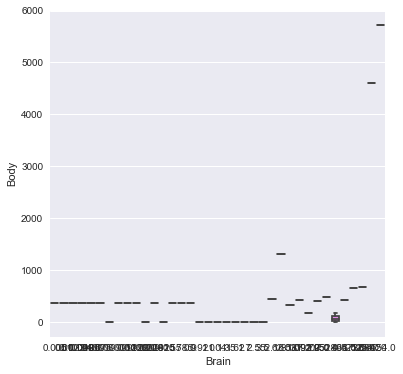

In [42]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'Brain', y = 'Body', data = df)

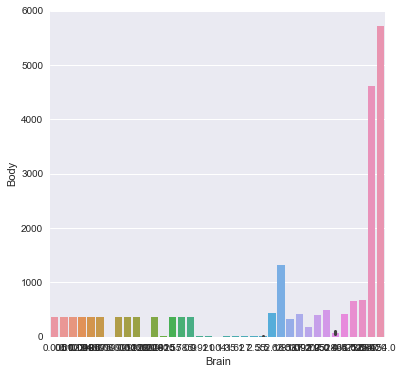

In [43]:
plt.figure(figsize=(6,6))
sns.barplot(x = 'Brain', y = 'Body', data = df)

## Step 3 - Modeling  


In [44]:

from sklearn.preprocessing import LabelEncoder
categorical_variables = df.dtypes[df.dtypes == 'object'].index
categorical_variables

Index([u'Type'], dtype='object')

In [45]:
le = LabelEncoder()
for var in categorical_variables:
    df[var] = le.fit_transform(df[var])

df.head()

,Body,Brain,Type
0,365.2875,0.005,1
1,365.2875,0.010,1
2,365.2875,0.023,1
3,365.2875,0.048,1
4,365.2875,0.023,1


In [46]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .8, random_state = 0)

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [49]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
y_pred = regressor.predict(X_test)

In [51]:
from sklearn.metrics import r2_score
print round(r2_score(y_test, y_pred)*100, 2) , '%'

82.62 %
